In [36]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from reproject import reproject_interp
from astropy.visualization import ImageNormalize, AsinhStretch, ZScaleInterval


## Galex NEAR-UV

In [10]:
hdul_galexuv=fits.open('Galex-near-UV.fits')
header_galexuv=hdul_galexuv[0].header
data_galexuv=hdul_galexuv[0].data

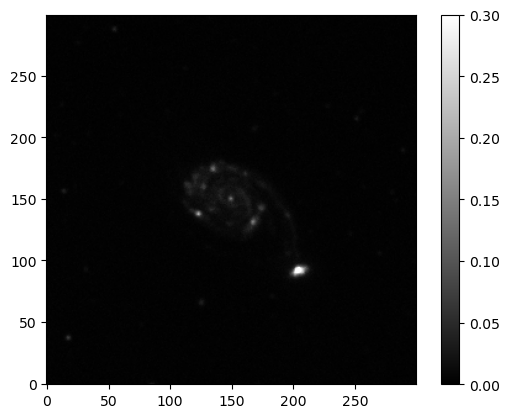

In [17]:
plt.imshow(data_galexuv, cmap='gray', origin='lower',vmin=0,vmax=0.3)
plt.colorbar()

In [27]:
# import optical image 
directory="/home/angeldavid/Desktop/Fedora/RESEARCH-INTERSHIPS/data_cubes/NGC7753/"
hdul_optical = fits.open(directory+"ngc7753-optical.fits")
header_optical = hdul_optical[0].header
data_optical = hdul_optical[0].data

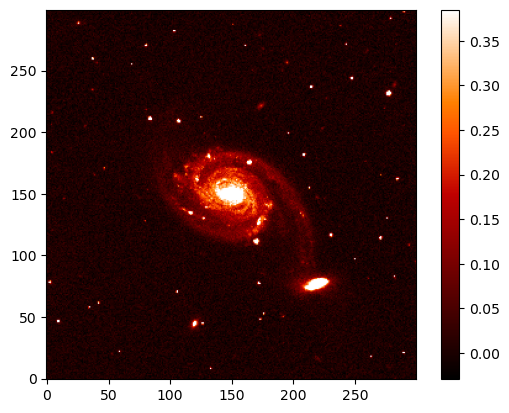

In [34]:
vmin, vmax = np.percentile(data_optical, [1, 99.5])
plt.imshow(data_optical, cmap='gist_heat', vmin=vmin, vmax=vmax,origin='lower')
plt.colorbar()
plt.show()

In [41]:
# Build WCS objects
wcs_opt = WCS(header_optical)
wcs_uv  = WCS(header_galexuv)

# Reproject GALEX onto the optical frame/shape
uv_reproj, footprint = reproject_interp((data_galexuv, wcs_uv), wcs_opt, shape_out=data_optical.shape)
uv_reproj[footprint <= 0] = np.nan  # mask out areas without coverage
# Nice stretches for display
norm_opt = ImageNormalize(data_optical, interval=ZScaleInterval(), stretch=AsinhStretch())
norm_uv  = ImageNormalize(uv_reproj,    interval=ZScaleInterval(), stretch=AsinhStretch())


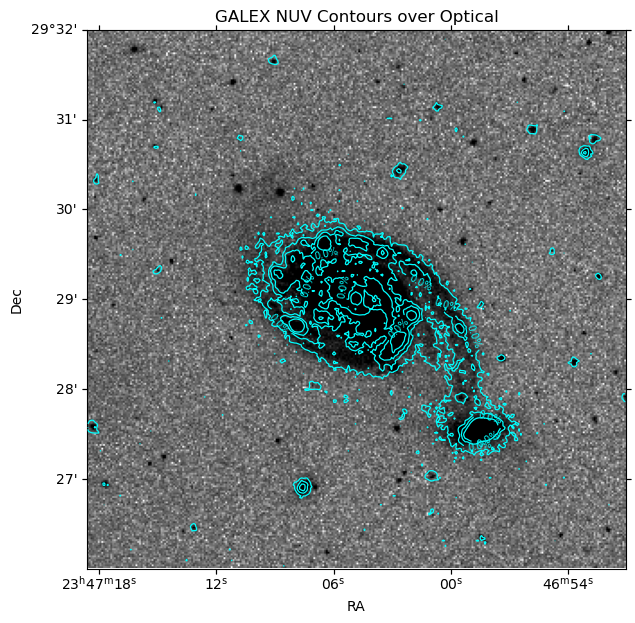

In [48]:
levels = np.nanpercentile(uv_reproj, [90, 95, 98, 99.5])

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs_opt)
ax.imshow(data_optical, origin='lower', cmap='gray_r', norm=norm_opt)
cs = ax.contour(uv_reproj, levels=levels, colors='cyan', linewidths=0.9)
ax.clabel(cs, fmt='%.1f%%', inline=True, fontsize=7)
ax.set_xlabel('RA'); ax.set_ylabel('Dec')
ax.set_title('GALEX NUV Contours over Optical')
plt.show()

## Infraded 2MASS-J 

In [18]:
hdul_2massj=fits.open("IF-2mass-J.fits")
header_2massj=hdul_2massj[0].header
data_2massj=hdul_2massj[0].data

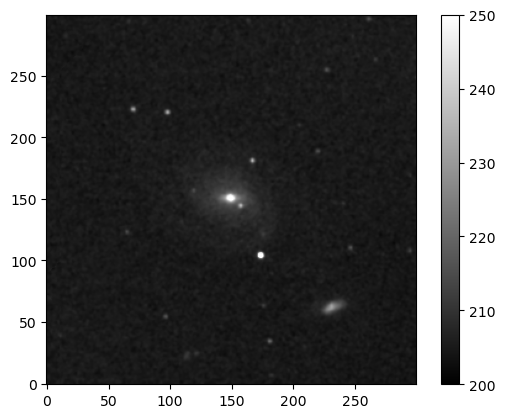

In [23]:
plt.imshow(data_2massj, cmap='gray', origin='lower',vmin=200,vmax=250)
plt.colorbar()

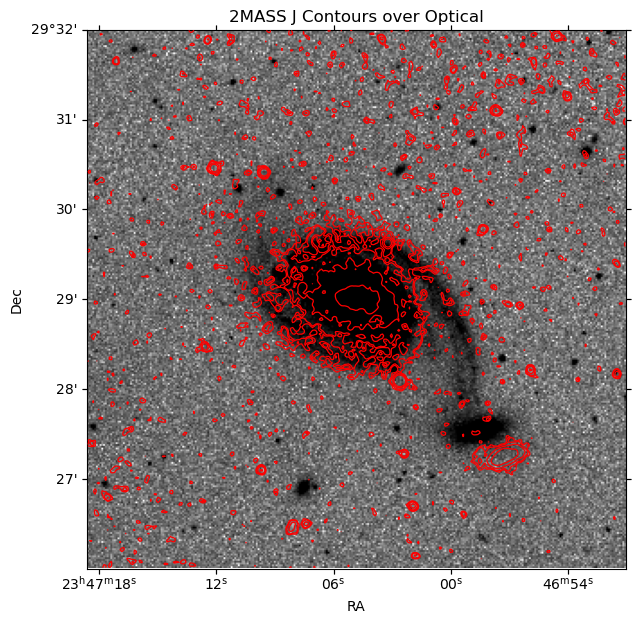

In [47]:
# overleay with the optical image
levels_j = np.nanpercentile(data_2massj, [90, 95, 98, 99.5])
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs_opt)
ax.imshow(data_optical, origin='lower', cmap='gray_r', norm=norm_opt)
cs = ax.contour(data_2massj, levels=levels_j, colors='red', linewidths=0.9)
ax.set_xlabel('RA'); ax.set_ylabel('Dec')
ax.set_title('2MASS J Contours over Optical')
plt.show()

## Infrared WISE 22

In [25]:
hdul_wise22=fits.open("Wise22-IF.fits")
header_wise22=hdul_wise22[0].header
data_wise22=hdul_wise22[0].data 

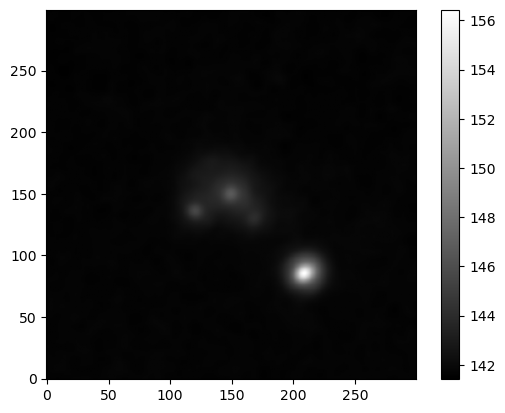

In [26]:
plt.imshow(data_wise22, cmap='gray', origin='lower')
plt.colorbar()

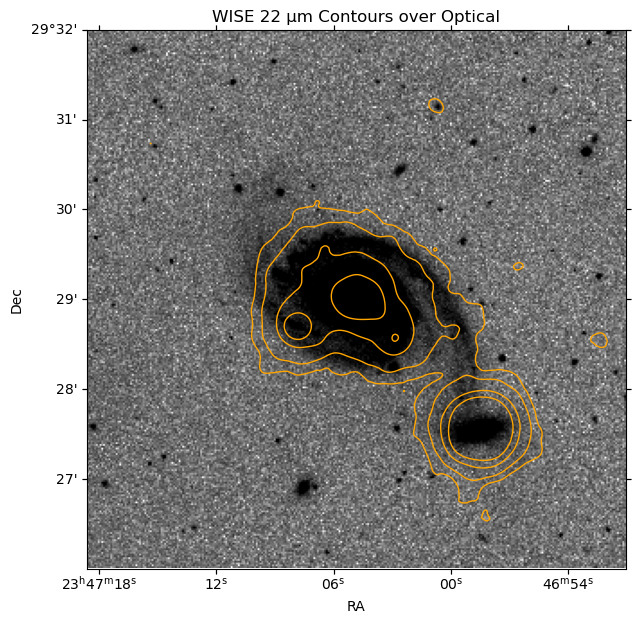

In [46]:
# Overlay WISE 22 µm contours on the optical image

# Build WCS for WISE 22 and reproject onto optical frame
wcs_wise22 = WCS(header_wise22)
wise2d = np.squeeze(data_wise22)  # ensure 2D
wise_reproj, wise_foot = reproject_interp((wise2d, wcs_wise22), wcs_opt, shape_out=data_optical.shape)
wise_reproj[wise_foot <= 0] = np.nan

# Choose contour levels from finite, positive pixels
vals = wise_reproj[np.isfinite(wise_reproj) & (wise_reproj > 0)]
if vals.size >= 10:
    levels_w = np.percentile(vals, [85, 90, 95, 98])
else:
    levels_w = np.linspace(np.nanmin(wise_reproj), np.nanmax(wise_reproj), 4)[1:]

fig = plt.figure(figsize=(7,7))
ax = plt.subplot(projection=wcs_opt)
ax.imshow(data_optical, origin='lower', cmap='gray_r', norm=norm_opt)
cs = ax.contour(wise_reproj, levels=levels_w, colors='orange', linewidths=1.0)
ax.set_xlabel('RA'); ax.set_ylabel('Dec')
ax.set_title('WISE 22 µm Contours over Optical')
plt.show()